In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('../train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
a = train[train.Age.isnull()].index

In [5]:
def miss_ayir(s):
    if "Miss" in s:
        return "Miss"
    elif "Mrs" in s:
        return "Mrs"
    elif "Mr" in s:
        return "Mr"
    elif "Ms" in s:
        return "Ms"
    elif '' in s:
        return "None"

In [6]:
train['Ek']=train.Name.apply(miss_ayir)

In [7]:
train.groupby('Ek').Age.mean()

Ek
Miss    21.773973
Mr      32.409774
Mrs     35.900000
Ms      28.000000
None    19.270172
Name: Age, dtype: float64

In [8]:
train["Age"]=train['Age'].fillna(train.groupby('Ek')['Age'].transform('mean'))

In [9]:
train2=train.copy()
train2.drop(columns=['Cabin'],inplace=True)
train2.Embarked=train2.Embarked.fillna('C')
train2.dropna(inplace=True)
cols=['Name','Sex','Ticket','Embarked','Ek']
train3=pd.concat([train2,pd.get_dummies(train2[cols])],axis=1).drop(cols,axis=1)

In [10]:
X=train3.drop('Survived',axis=1)
y=train3.Survived

In [25]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=286)

print("Tüm veri kümesi Kurtulamayanlar yüzdesi : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Test verisi Kurtulamayanlar yüzdesi     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))
print("Eğitim verisi Kurtulamayanlar yüzdesi   : %{:.0f} ".format(len(y_egitim[y_egitim==0])/len(y_egitim)*100))

Tüm veri kümesi Kurtulamayanlar yüzdesi : %62 
Test verisi Kurtulamayanlar yüzdesi     : %62 
Eğitim verisi Kurtulamayanlar yüzdesi   : %62 


In [108]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(max_iter=10000,random_state=286,solver='liblinear')
log_reg.fit(X_egitim,y_egitim)

multi_log=LogisticRegression(random_state=286,max_iter=10000,multi_class='multinomial',solver='lbfgs')
multi_log.fit(X_egitim,y_egitim)

test_dogruluk_onevsr=log_reg.score(X_test,y_test)
egitim_dogruluk_onevsr=log_reg.score(X_egitim,y_egitim)

test_multi_log=multi_log.score(X_test,y_test)
egitim_multi_log=multi_log.score(X_egitim,y_egitim)
print('One-vs-rest', '-'*20,
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(test_dogruluk_onevsr), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(egitim_dogruluk_onevsr), sep='\n')

print('\n\nMultinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(test_multi_log), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(egitim_multi_log), sep='\n')


One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.84
Modelin test verisindeki doğruluğu   : 0.93


Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.85
Modelin test verisindeki doğruluğu   : 0.96


In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
tahmin_egitim=log_reg.predict(X_egitim)
tahmin_test=log_reg.predict(X_test)
hata_matrisi_egitim=confusion_matrix(y_egitim,tahmin_egitim)
hata_matrisi_test=confusion_matrix(y_test,tahmin_test)
print(hata_matrisi_egitim)
print(hata_matrisi_test)

[[374  10]
 [ 36 203]]
[[151  14]
 [ 26  77]]


In [61]:
def metrics(X,y,tip):
    performans=pd.DataFrame(columns=['Doğruluk','Hassasiyet','Hata Oranı','Duyarlılık','F1 Score'])
    dogruluk=accuracy_score(y_test,tahmin_test)
    hassasiyet=precision_score(y_test,tahmin_test)
    hata_oranı=1-accuracy_score(y_test,tahmin_test)
    duyarlilik=recall_score(y_test,tahmin_test)
    f1=f1_score(y_test,tahmin_test)
    columns=pd.Series({'Doğruluk':dogruluk,
                                  'Hassasiyet':hassasiyet,
                                  'Hata Oranı':hata_oranı,
                                  'Duyarlılık':duyarlilik,
                                  'F1 Score':f1},name=tip)
    performans=performans.append(columns)
    return performans

In [62]:
metrics(X,y,tip='OnevsRest')

,Doğruluk,Hassasiyet,Hata Oranı,Duyarlılık,F1 Score
OnevsRest,0.850746,0.846154,0.149254,0.747573,0.793814


In [66]:
print(classification_report(y_test,tahmin_test))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       165
           1       0.85      0.75      0.79       103

    accuracy                           0.85       268
   macro avg       0.85      0.83      0.84       268
weighted avg       0.85      0.85      0.85       268



### Cross Validation

In [73]:
from sklearn.model_selection import cross_validate, cross_val_score

In [104]:
cv=cross_validate(estimator=log_reg,X=X,y=y,cv=10,return_train_score=True)
print('Eğitim Skorları Ort.:',cv['train_score'].mean(),sep='\n')
print('Test Skorları Ort.:',cv['test_score'].mean(),sep='\n')

Eğitim Skorları Ort.:
0.9239304983483863
Test Skorları Ort.:
0.8193133583021222


In [102]:
cv = cross_validate(estimator=log_reg, 
                     X=X,
                     y=y,
                     cv=10,
                     scoring = ['accuracy', 'precision', 'r2'],return_train_score=True
                    )

In [103]:
print('Test Kümesi Doğruluk Ortalaması     : {:.2f}'.format(cv['test_accuracy'].mean()))
print('Test Kümesi R-kare  Ortalaması      : {:.2f}'.format(cv['test_r2'].mean()))
print('Test Kümesi Hassasiyet Ortalaması   : {:.2f}'.format(cv['test_precision'].mean()))
print('Eğitim Kümesi Doğruluk Ortalaması   : {:.2f}'.format(cv['train_accuracy'].mean()))
print('Eğitim Kümesi R-kare  Ortalaması    : {:.2f}'.format(cv['train_r2'].mean()))
print('Eğitim Kümesi Hassasiyet Ortalaması : {:.2f}'.format(cv['train_precision'].mean()))

Test Kümesi Doğruluk Ortalaması     : 0.82
Test Kümesi R-kare  Ortalaması      : 0.24
Test Kümesi Hassasiyet Ortalaması   : 0.78
Eğitim Kümesi Doğruluk Ortalaması   : 0.92
Eğitim Kümesi R-kare  Ortalaması    : 0.68
Eğitim Kümesi Hassasiyet Ortalaması : 0.95


## Hiperparametre Ayarlama

### Grid Search

In [86]:
from sklearn.model_selection import GridSearchCV
parametreler = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }
grid_cv=GridSearchCV(estimator=lrm, param_grid=parametreler, cv=10)
grid_cv.fit(X, y)

print("En iyi parametreler : ", grid_cv.best_params_)
print("En iyi skor         : ", grid_cv.best_score_)

En iyi parametreler :  {'C': 1000, 'penalty': 'l2'}
En iyi skor         :  0.8417478152309611


In [ ]:
sonuclar = grid_cv.cv_results_
df = pd.DataFrame(sonuclar)
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)

df.head()

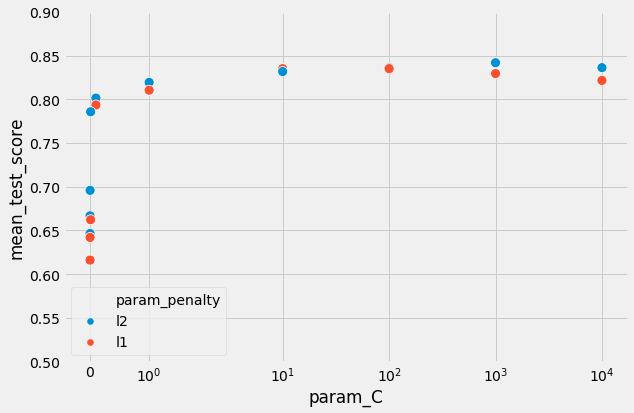

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))
sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df, s=100)
plt.xscale('symlog')
plt.ylim((0.5,0.9))
plt.show()

### RandomizedSearchCV

In [105]:
parametreler = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [112]:
from sklearn.model_selection import RandomizedSearchCV
rs_cv = RandomizedSearchCV(estimator=log_reg,
                           param_distributions = parametreler,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision')
rs_cv.fit(X, y)
sonuçlar_rs = rs_cv.cv_results_
df_rs = pd.DataFrame(sonuçlar_rs)
df_rs = df_rs[['param_penalty','param_C', 'mean_test_score']]
df_rs = df_rs.sort_values(by='mean_test_score', ascending = False)
df_rs.head()

,param_penalty,param_C,mean_test_score
5,l2,1000,0.810997
8,l1,1000,0.796815
4,l1,100,0.796168
2,l2,10,0.795263
3,l2,1,0.784216


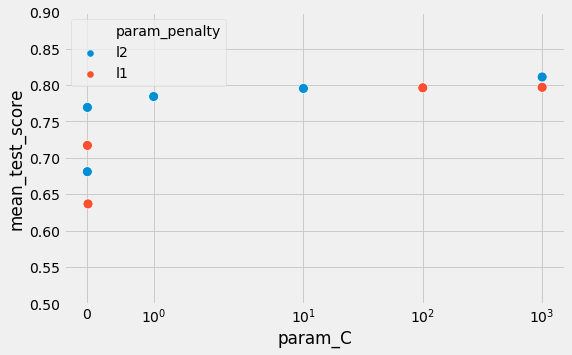

In [114]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df_rs, s=100)
plt.xscale('symlog')
plt.ylim((0.5,0.9))
plt.show()